In [1]:
import warnings
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import auc, roc_curve, classification_report

In [2]:
warnings.filterwarnings('ignore')
mpl.rcParams['font.sans-serif'] = [u'simHei']

In [3]:
# 一、数据加载
path = "../datas/iris.data"
names = ['A', 'B', 'C', 'D', 'cla']
df = pd.read_csv(filepath_or_buffer=path, sep=",", header=None, names=names)

In [4]:
# 二、数据的清洗
# class_name_2_label = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# df['cla'] = list(map(lambda cla: class_name_2_label[cla], df['cla'].values))
# print(df['cla'].values)
# df.info()

In [5]:
# 三、根据需求和原始模型从最原始的特征属性中获取具体的特征属性矩阵X和目标属性矩阵Y
# X = df.drop('cla', axis=1)
X = df.iloc[:, :4]
# print(X)
X = np.asarray(X).astype(np.float64)
Y = df['cla']

In [6]:
# 对目标属性做一个类别的转换，将字符串的数据转换为从0开始的int值
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(label_encoder.classes_)
print(label_encoder.transform(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print(label_encoder.inverse_transform([0, 1, 2, 0, 2, 1]))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']


In [7]:
# 四、数据分割(将数据分割为训练数据和测试数据)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("训练数据X的格式:{}, 以及数据类型:{}".format(x_train.shape, type(x_train)))
print("测试数据X的格式:{}".format(x_test.shape))
print("训练数据Y的数据类型:{}".format(type(y_train)))
print("Y的取值范围:{}".format(np.unique(Y)))

训练数据X的格式:(120, 4), 以及数据类型:<class 'numpy.ndarray'>
测试数据X的格式:(30, 4)
训练数据Y的数据类型:<class 'numpy.ndarray'>
Y的取值范围:[0 1 2]


In [8]:
# 五、特征工程的操作
# # a. 创建对象(标准化操作)
# scaler = StandardScaler()
# # b. 模型训练+训练数据转换
# x_train = scaler.fit_transform(x_train, y_train)
# # c. 基于训练好的对象对数据做一个转换
# x_test = scaler.transform(x_test)

In [21]:
# 六、模型对象的构建
"""
def __init__(self,
             criterion="gini",
             splitter="best",
             max_depth=None,
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             random_state=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             min_impurity_split=None,
             class_weight=None,
             presort=False)
    criterion: 给定决策树构建过程中的纯度的衡量指标，可选值: gini、entropy， 默认gini
    splitter：给定选择特征属性的方式，best指最优选择，random指随机选择(局部最优)
    max_features：当splitter参数设置为random的有效，是给定随机选择的局部区域有多大。
    max_depth：剪枝参数，用于限制最终的决策树的深度，默认为None，表示不限制
    min_samples_split=2：剪枝参数，给定当数据集中的样本数目大于等于该值的时候，允许对当前数据集进行分裂；如果低于该值，那么不允许继续分裂。
    min_samples_leaf=1, 剪枝参数，要求叶子节点中的样本数目至少为该值。
    class_weight：给定目标属性中各个类别的权重系数。
"""
algo = DecisionTreeClassifier(max_depth=3)

In [22]:
# 七. 模型的训练
algo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
# 八、模型效果的评估
print("各个特征属性的重要性权重系数(值越大，对应的特征属性就越重要):{}".format(algo.feature_importances_))
print("训练数据上的分类报告:")
print(classification_report(y_train, algo.predict(x_train)))
print("测试数据上的分类报告:")
print(classification_report(y_test, algo.predict(x_test)))
print("训练数据上的准确率:{}".format(algo.score(x_train, y_train)))
print("测试数据上的准确率:{}".format(algo.score(x_test, y_test)))

各个特征属性的重要性权重系数(值越大，对应的特征属性就越重要):[0.         0.         0.55131392 0.44868608]
训练数据上的分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.95      0.98        42
           2       0.95      1.00      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

测试数据上的分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

训练数据上的准确率:0.9833333333333333
测试数据上的准确率:0.9666666666666667


In [24]:
# 查看相关属性
test1 = [x_test[6]]
print("预测函数:")
print(algo.predict(test1))
print("预测概率函数:")
print(algo.predict_proba(test1))

预测函数:
[0]
预测概率函数:
[[1. 0. 0.]]


In [25]:
# ROC和AUC的计算
# 对于三个类别分开计算auc和roc的值
y_predict_proba = algo.predict_proba(x_train)
# print(y_predict_proba)
# 针对于类别1
y1_true = (y_train == 0).astype(np.int)
y1_score = y_predict_proba[:, 0]
fpr1, tpr1, _ = roc_curve(y1_true, y1_score)
auc1 = auc(fpr1, tpr1)
# 针对于类别2
y2_true = (y_train == 1).astype(np.int)
y2_score = y_predict_proba[:, 1]
fpr2, tpr2, _ = roc_curve(y2_true, y2_score)
auc2 = auc(fpr2, tpr2)
# 针对于类别3
y3_true = (y_train == 2).astype(np.int)
y3_score = y_predict_proba[:, 2]
fpr3, tpr3, _ = roc_curve(y3_true, y3_score)
auc3 = auc(fpr3, tpr3)
print((auc1, auc2, auc3))

(1.0, 0.9981684981684982, 0.9981684981684982)


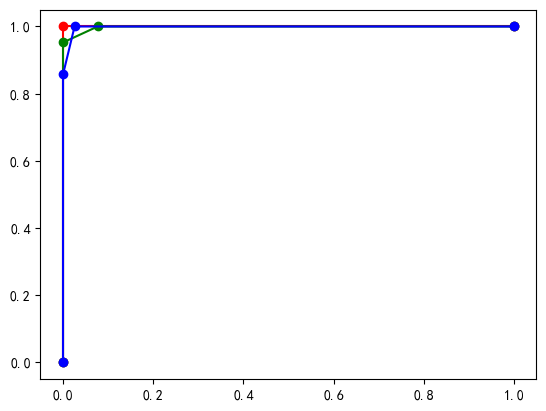

In [26]:
plt.plot(fpr1, tpr1, 'r-o')
plt.plot(fpr2, tpr2, 'g-o')
plt.plot(fpr3, tpr3, 'b-o')
plt.show()

# 决策树可视化

In [27]:
# 方式一：输出dot文件，然后使用dot的命令进行转换
# 命令：dot -Tpdf iris01.dot -o iris01.pdf 或者dot -Tpng iris01.dot -o iris01.png
from sklearn import tree
# # #  {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
with open('iris01.dot', 'w') as writer:
    tree.export_graphviz(decision_tree=algo, out_file=writer,
                         feature_names=['x1', 'x2', 'x3', 'x4'],
                         class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                         filled=True, rounded=True,
                         special_characters=True,
                         node_ids=True)

In [29]:
# # # # 方式二：直接使用pydotpuls库将数据输出为图像
import pydotplus
from sklearn import tree

# import os
# os.environ["PATH"] += os.pathsep + 'G:/program_files/graphviz/bin'

dot_data = tree.export_graphviz(decision_tree=algo, out_file=None,
                                # feature_names=['x2', 'x3', 'x4'],
                                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                filled=True, rounded=True,
                                special_characters=True,
                                node_ids=True
                                )
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris02.png")
graph.write_pdf("iris02.pdf")

True